In [1]:
import os
import argparse
from bertopic import BERTopic
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np

# TODO  check babyplot for 3D visualisation

In [3]:
def read_data(input_file):
    with open(input_file) as file:
        lines = file.readlines()
        text_to_analyse_list = [line.rstrip() for line in lines]
    return text_to_analyse_list

In [4]:
data = read_data("../data/BERTopicInput.csv")

In [5]:
model = BERTopic(verbose=True, language="multilingual", nr_topics=30) # vectorizer_model=vectorizer_model)#, nr_topics=20)
topics, probs = model.fit_transform(data)

Batches:   0%|          | 0/9767 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [96]:
model.visualize_topics()

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [ ]:
model.save("../models/BERTopic_nr_topics_30/model.pt")

In [4]:
model=BERTopic.load("../models/BERTopic_50Char10ClassesRedo/BERTopicmodel")

In [5]:
def write_multi_sheet_excel(model, path):
    writer = pd.ExcelWriter(path, engine='xlsxwriter')
    for i in model.get_representative_docs().keys():
        df = pd.DataFrame(model.get_representative_docs()[i], columns=['message'])
        df.to_excel(writer, sheet_name=model.get_topic_info()[model.get_topic_info()['Topic']==i]['Name'].values[0][:31])
    writer.save()

In [ ]:
write_multi_sheet_excel(model=model, path="../models/BERTopic_50Char10ClassesRedo/results.xlsx")

In [ ]:
import sys
import itertools
# setting path
sys.path.append('../src/BERTopic/')
from runBERTopic import BERTopicAnalysis

nr_topics_list = ["auto"]
min_topic_size_list = [10,25,50,100,200,400,800,1000,1500]
hbscan_min_cluster_size_list = [25,50,100,200]


for i in itertools.product(nr_topics_list,min_topic_size_list,hbscan_min_cluster_size_list):
    if os.path.exists(f"../models/BERTopic50Char{i[0].capitalize()}Classes{i[1]}MinTopicSize{i[2]}HbscanMinClusterSize/BERTopicmodel"):
        print('wuhu', i)
        continue
    BERTopic_Analysis = BERTopicAnalysis(input_file="../data/BERTopicInput50CharMin.csv",
                                         k_cluster=i[0],
                                         min_topic_size=i[1],
                                         hbscan_min_cluster_size=i[2]
                                     )
    print(i)    
    BERTopic_Analysis.run_all()


In [513]:
model=BERTopic.load("../models/BERTopic_50Char10Classes/BERTopicmodel")

In [514]:
model

In [7]:
with open("../data/BERTopicInput50CharMin.csv") as file:
    lines = file.readlines()
    text_to_analyse_list = [line.rstrip() for line in lines]

In [379]:
df = pd.read_csv("../models/BERTopic_50Char10Classes/pred_on_whole_data_translated_Sentiment.csv")

FileNotFoundError: [Errno 2] No such file or directory: '../models/BERTopic_50Char10Classes/pred_on_whole_data_translated_Sentiment.csv'

In [517]:
df.loc[0].messageText

'Друзья, нужна помощь🙏🏼У кого есть карта европейская и по ней можно перевести деньги на счёт банка Револют? Нужно оплатить доставку 7 евро, но ни одна с украинских карт это сделать не может( я вам эти деньги на украинскую карту верну. Буду очень благодарна😊'

In [522]:
pred, probs=model.transform(df.loc[1].messageText, calculate_probabilities=True)

TypeError: transform() got an unexpected keyword argument 'calculate_probabilities'

In [521]:
probs

array([1.])

In [512]:
model.transform(df.loc[0]['messageText'])

AttributeError: 'RobertaForSequenceClassification' object has no attribute 'transform'

In [9]:
pred, probs=model.transform(df['messageText'])
df['cluster'] = pred

Batches:   0%|          | 0/6510 [00:00<?, ?it/s]

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [27]:
df[df.cluster==4].to_csv("../models/BERTopic_50Char10Classes/cluster4.csv", index=None)

In [413]:
df.to_csv("../models/BERTopic_50Char10Classes/pred_on_whole_data_translated_sentiment.csv", index=None)

In [13]:
df['week']=df['messageDatetime'].apply(lambda x: pd.to_datetime(x).isocalendar()[1])

In [123]:
df_value_counts = df.groupby(['cluster','week']).count().reset_index()

In [478]:
df[df.cluster==-1001282380951]

,index,chat,messageSender,messageDatetime,messageText,cluster,week,messageTextEnglish,sentiment,sentiment_name,cluster_name


In [94]:
df[df.cluster==0].messageText[223]

'подскажите, где можно обратиться за помощью на счет зуба'

In [57]:
df_value_counts = df[df.chat.isin(['https://t.me/zh_helps_ukraine', 'https://t.me/zh_helps_UArefugee',
       'https://t.me/zurich_hb_help', 'https://t.me/zh_housing',
       'https://t.me/Zurich_UA', 'https://t.me/zh_helps_UArefugees', 'https://t.me/Zh_helps_UA_mums', 'https://t.me/job_sw_ukrainians',
       'https://t.me/zh_back_ukraine', 'https://t.me/zh_helps_logistics',])].value_counts(['cluster', 'week']).reset_index()
df_value_counts.columns = ['cluster', 'week', 'count']
mydict = {'no_class':-1,
          'medical': 0, 
          'teaching': 1,
          'banking': 2,
          'transport_UKR_CH': 3,
          'pets': 4,
          'immigration': 5,
          'transport_train_EU': 6,
          'website_links': 7,
          'volunteering': 8,
          'transport_train_CH': 9}
df_value_counts['cluster_names'] = df_value_counts['cluster'].apply(lambda x: list(mydict.keys())[list(mydict.values()).index(x)])

In [68]:
df_value_counts.cluster_names.value_counts()

no_class              30
doctoral              30
teaching              30
volunteering          30
website_links         30
transport_UKR_CH      30
pets                  29
immigration           29
banking               29
transport_train_EU    29
transport_train_CH    28
Name: cluster_names, dtype: int64

In [431]:
df.messageSender.unique()

array([ 377355740,  296678464,  879279590, ..., 1174378249, 1351065038,
       1842924276])

In [471]:
df_actors = pd.DataFrame(columns=["cluster_name", "message_sender", "nr_post"])
for i in df.cluster_name.unique():
    df[df['cluster_name']==i].value_counts('messageSender').iloc[:10]
    df_actors_i = df[df['cluster_name']==i].value_counts('messageSender').iloc[:10].reset_index()
    df_actors_i["cluster_name"] = i
    df_actors_i = df_actors_i[["cluster_name", "messageSender", 0]]
    df_actors_i.columns = ["cluster_name", "message_sender", "nr_post"]
    df_actors = pd.concat([df_actors, df_actors_i], axis=0)

In [531]:
df[df.messageSender.isin(df_actors.message_sender.unique())].to_csv("../models/BERTopic_50Char10Classes/pred_on_whole_data_translated_sentiment_network.csv", index=False)

In [534]:
df = df[df.messageSender.isin(df_actors.message_sender.unique())]

In [537]:
df.cluster_name.value_counts()

medical               1232
teaching              1088
volunteering           699
website_links          663
immigration            506
banking                408
transport_train_CH     396
pets                   304
transport_train_EU     199
transport_UKR_CH       160
Name: cluster_name, dtype: int64

In [476]:
len(df_actors.message_sender.unique())

54

In [454]:
df[df['cluster_name']==i].value_counts('messageSender').iloc[:10].reset_index()


,messageSender,0
0,5025746576,84
1,5237176617,62
2,264593736,51
3,76712299,46
4,-1001282380951,39
5,1291557301,39
6,100884582,36
7,5116434803,35
8,-1001506638003,34
9,1335905103,33


In [540]:
df.value_counts('week')

week
12    372
14    273
17    265
35    256
34    249
22    248
13    248
11    242
16    234
15    233
18    224
36    219
27    217
26    208
21    197
19    196
29    174
25    171
23    165
20    163
24    156
32    150
31    144
33    132
30    132
37    130
28    121
10    103
9      24
8       9
dtype: int64

In [539]:
df[df['messageSender']==76712299].cha

array(['https://t.me/zh_helps_UArefugee', 'https://t.me/zh_housing',
       'https://t.me/Zh_helps_UA_mums', 'https://t.me/AargauUkraine',
       'https://t.me/UASchweiz'], dtype=object)

In [500]:
df[df.messageSender==-1001506638003].shape

(59, 11)

In [449]:
df[df['cluster_name']=='banking'].value_counts('messageSender').iloc[:10].index

Int64Index([ 433287388, 5349764837,  480572696,  954192350, 1750947798,
            1811075547,  618181745,  848673555,  632386867,  269969015],
           dtype='int64', name='messageSender')

In [542]:
import plotly.express as px
# for i in df_value_counts.cluster.unique()[1:]:
fig = px.line(df_value_counts[df_value_counts.cluster != -1].sort_values(['week']), x="week", y="count", color='cluster_names', title='Cluster over time')
fig.show()
# fig.write_html("../models/BERTopic_50Char10Classes/AllGroups.html")

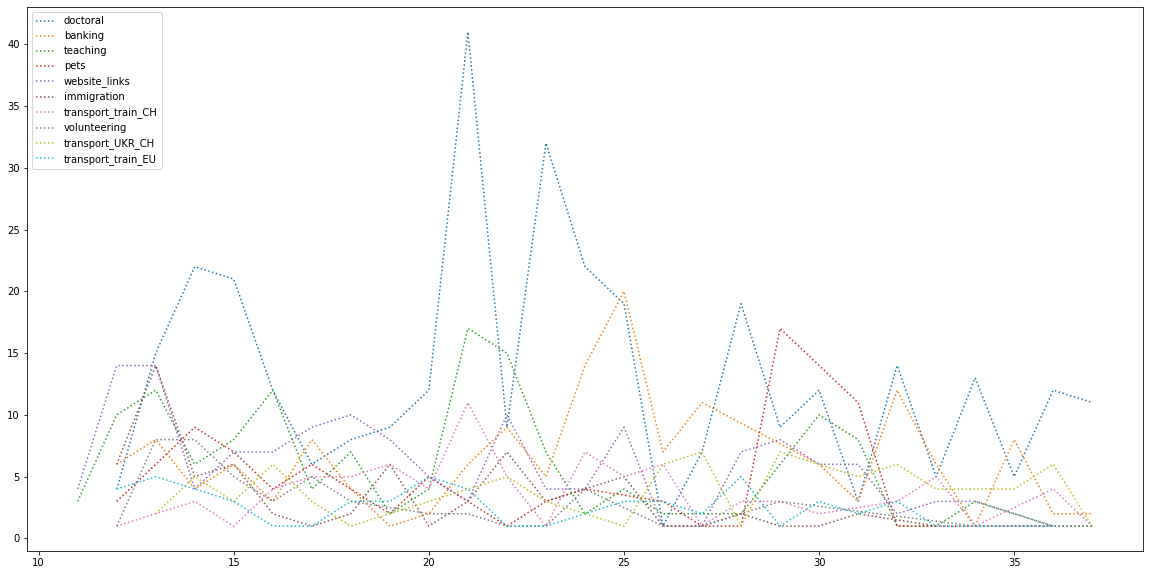

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
for i in df_value_counts.cluster.unique()[1:]:
    plt.plot(df_value_counts[df_value_counts.cluster == i].sort_values(['week'])['week'], df_value_counts[df_value_counts.cluster == i].sort_values(['week'])['count'], linestyle = 'dotted', label=list(mydict.keys())[list(mydict.values()).index(i)])
plt.legend(loc="upper left")
plt.show()

In [77]:
df[df.chat.isin(['https://t.me/zh_helps_ukraine', 'https://t.me/zh_helps_UArefugee',
       'https://t.me/zurich_hb_help', 'https://t.me/zh_housing',
       'https://t.me/Zurich_UA', 'https://t.me/zh_helps_UArefugees', 'https://t.me/Zh_helps_UA_mums', 'https://t.me/job_sw_ukrainians',
       'https://t.me/zh_back_ukraine', 'https://t.me/zh_helps_logistics',])][df[df.chat.isin(['https://t.me/zh_helps_ukraine', 'https://t.me/zh_helps_UArefugee',
       'https://t.me/zurich_hb_help', 'https://t.me/zh_housing',
       'https://t.me/Zurich_UA', 'https://t.me/zh_helps_UArefugees', 'https://t.me/Zh_helps_UA_mums', 'https://t.me/job_sw_ukrainians',
       'https://t.me/zh_back_ukraine', 'https://t.me/zh_helps_logistics',])].cluster==0].to_csv("../teest.csv")#.messageText[182844]

In [107]:
list(mydict.keys())[list(mydict.values()).index(0)]

'doctoral'

In [32]:
dfWeek = pd.DataFrame(df['messageDatetime'].apply(lambda x: pd.to_datetime(x).isocalendar()[1]).value_counts()).merge(dfZ['messageDatetime'].apply(lambda x: pd.to_datetime(x).isocalendar()[1]).value_counts(), left_index=True, right_index=True).sort_index()


,chat,messageSender,messageDatetime,messageText,cluster
0,https://t.me/refugeesinSwitzerland,1783309641,2022-09-16 13:58:53+00:00,"Я тут 15 лет, поэтому и удивляюсь отсутствию к...",-1
1,https://t.me/refugeesinSwitzerland,1335905103,2022-09-16 13:56:17+00:00,Спрашивайте у SEM по вашему случаю. Все индиви...,-1
2,https://t.me/refugeesinSwitzerland,264593736,2022-09-16 13:43:19+00:00,"В общем случае нет, если у вас нет веских прич...",-1
3,https://t.me/refugeesinSwitzerland,264593736,2022-09-16 13:42:19+00:00,Вы не можете свободно выбирать место жительств...,-1
4,https://t.me/refugeesinSwitzerland,400069603,2022-09-16 13:41:39+00:00,"🙏🏻Добрый день! Скажите, пожалуйста, примет ли ...",-1
...,...,...,...,...,...
208293,https://t.me/StGallenUkraine,799107007,2022-03-19 20:40:40+00:00,защита и убежищеОбновлено: 16.03.2022 10:00Фед...,-1
208294,https://t.me/StGallenUkraine,1820952899,2022-03-19 20:14:30+00:00,Доброго вечора. Підскажіть будь ласка в Санкт-...,-1
208295,https://t.me/StGallenUkraine,799107007,2022-03-19 09:44:59+00:00,"Если какие-то вопросы, обращайтесь. Чем смогу ...",-1
208296,https://t.me/StGallenUkraine,1032103810,2022-03-19 09:34:48+00:00,Здравствуйте) и мы в Роршах) я с сыном 9 лет и...,-1


# Sentiment

In [142]:
df = pd.read_csv("../models/BERTopic_50Char10Classes/pred_on_whole_data_translated.csv")
print(df.shape)
df = df[df.messageTextEnglish.apply(type) == str]
print(df.shape)
df = df[df['messageTextEnglish'].notnull()]
print(df.shape)
df[df["messageText"].str.len()<512]
df = df[df['messageTextEnglish'].str.len() <= 513]
df.reset_index(inplace=True)

(27984, 7)
(27983, 7)
(27983, 7)


In [111]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")

model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment").to("mps")

RuntimeError: Expected one of cpu, cuda, xpu, mkldnn, opengl, opencl, ideep, hip, ve, ort, mlc, xla, lazy, vulkan, meta, hpu device type at start of device string: mps

In [158]:
labels = ['Negative', 'Neutral', 'Positive']
def analyse_sentiment(x):
    encoded_tweet = tokenizer(x, return_tensors='pt')
    output = model(**encoded_tweet)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    return scores
def scores_to_sentiment(x):
    max_value = max(x.tolist())
    max_index = x.tolist().index(max_value)
    return labels[max_index] 
    

In [159]:
from tqdm import tqdm
tqdm.pandas()

# df['sentiment'] = df['messageTextEnglish'].progress_apply(lambda x: analyse_sentiment(x))
df['sentiment_name'] = df['sentiment'].progress_apply(lambda x: scores_to_sentiment(x))

100%|██████████| 27968/27968 [00:00<00:00, 842487.64it/s]


In [ ]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [163]:
df[df.cluster==0].value_counts('sentiment_name').values

array([5068, 1618,  548])

In [183]:
df['cluster_name'] = df.cluster.apply(lambda x: list(mydict.keys())[list(mydict.values()).index(x)])

In [186]:
df.value_counts(['cluster_name', 'sentiment_name']).reset_index()

,cluster_name,sentiment_name,0
0,doctoral,Neutral,5068
1,banking,Neutral,2577
2,teaching,Neutral,2000
3,transport_UKR_CH,Neutral,1827
4,website_links,Neutral,1724
5,doctoral,Negative,1618
6,volunteering,Neutral,1547
7,pets,Neutral,1498
8,transport_train_EU,Neutral,1468
9,transport_train_CH,Neutral,1382


In [225]:
df_test.co

Index(['cluster_name', 'sentiment_name', 0], dtype='object')

In [278]:
# df_test.columns = ['cluster_name', 'sentiment_name', 'amount']
# df_test['percentage'] = ''
for index, row in df_test.iterrows():
    percentage = row['amount']/df_test[df_test.cluster_name==row['cluster_name']].amount.sum()
    df_test.loc[index, "percentage"] = percentage
    # df_test[df_test.cluster_name==i].amount 
    # series = df_test[df_test.cluster_name==i]['amount'].apply(lambda x: float(x)/float(df_test[df_test.cluster_name==i].amount.sum()))
    

In [277]:
df_test.loc[16, "percentage"]

''

In [244]:
df_test[df_test.cluster_name==i]['amount'].apply(lambda x: float(x)/float(df_test[df_test.cluster_name==i].amount.sum()))

28    0.051690
4     0.856859
23    0.091451
Name: amount, dtype: float64

In [247]:
df_test[df_test.cluster_name==i]['percentage'] = df_test[df_test.cluster_name==i]['amount'].apply(lambda x: float(x)/float(df_test[df_test.cluster_name==i].amount.sum()))

In [250]:
series = df_test[df_test.cluster_name==i]['amount'].apply(lambda x: float(x)/float(df_test[df_test.cluster_name==i].amount.sum()))

In [255]:
for i in series:
    print(i)

0.05168986083499006
0.856858846918489
0.09145129224652088


In [254]:
df.iloc[series.index.to_list(), 'index'] = 1

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [240]:
df_test[df_test.cluster_name==i]['amount'].apply(lambda x: float(x)/float(df_test[df_test.cluster_name==i].amount.sum()))

16    0.105808
1     0.809105
19    0.085086
Name: amount, dtype: float64

In [239]:
df_test[df_test.cluster_name==i].sum()

cluster_name        bankingbankingbanking
sentiment_name    NegativeNeutralPositive
amount                               3185
percentage                               
dtype: object

In [231]:
df_test[df_test.cluster_name==i]

,cluster_name,sentiment_name,amount,percentage
28,website_links,Negative,104,
4,website_links,Neutral,1724,
23,website_links,Positive,184,


In [229]:
df_test[df_test.cluster_name==i].amount.sum()

2012

In [223]:
df_test.apply(lambda x: x[0]['cluster_name'], axis=0)

TypeError: string indices must be integers

In [ ]:
import plotly.express as px

long_df = px.data.medals_long()

fig = px.bar(df_test, x="cluster_name", y=0, color="sentiment_name", title="Sentiment within cluster")
fig.show()

In [279]:
import plotly.express as px

long_df = px.data.medals_long()

fig = px.bar(df_test, x="cluster_name", y="percentage", color="sentiment_name", title="Sentiment within cluster")
fig.show()

In [ ]:
for i in df.cluster.unique():
    print(i)
    fig1, ax1 = plt.subplots()
    ax1.pie(df[df.cluster==i].value_counts('sentiment_name').values, labels=df[df.cluster==i].value_counts('sentiment_name').index, autopct='%1.1f%%',
        shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    title = list(mydict.keys())[list(mydict.values()).index(i)]
    fig1.suptitle(title, fontsize=12)

    

In [189]:
import plotly.express as px

long_df = px.data.medals_long()

fig = px.bar(long_df, x="nation", y="count", color="medal", title="Long-Form Input")
fig.show()

In [378]:
df[(df.cluster_name=='teaching') & (df.sentiment_name=='Positive')].reset_index().messageText[183]

'Швейцарські університети користуються міжнародною популярністю, і студентам з України вже надається нескладна допомога для завершення навчання тут.'

In [203]:
df_test[df_test.cluster_name.isin(["banking", "doctoral", "immigration"])]

,cluster_name,sentiment_name,0
16,banking,Negative,337
5,doctoral,Negative,1618
21,immigration,Negative,253
1,banking,Neutral,2577
0,doctoral,Neutral,5068
10,immigration,Neutral,1255
19,banking,Positive,271
13,doctoral,Positive,548
27,immigration,Positive,118


In [235]:
df_test = df.value_counts(['cluster_name', 'sentiment_name']).reset_index().sort_values(['sentiment_name', 'cluster_name'], axis=0)

In [202]:
df_test[df_test.cluster_name.isin(["banking", "doctoral", "immigration"])]

,cluster_name,sentiment_name,0
16,banking,Negative,337
5,doctoral,Negative,1618
21,immigration,Negative,253
1,banking,Neutral,2577
0,doctoral,Neutral,5068
10,immigration,Neutral,1255
19,banking,Positive,271
13,doctoral,Positive,548
27,immigration,Positive,118


In [104]:
from scipy.special import softmax

In [149]:




for i in range(len(scores)):
    
    l = labels[i]
    s = scores[i]
    print(l,s)

Negative 0.08726435
Neutral 0.41404516
Positive 0.49869052


In [106]:
df.messageTextEnglish[0]

'Friends, need helpWho has a European card and can transfer money to the bank account of Revolut? You need to pay for the delivery of 7 euros, but none of the Ukrainian cards can do it( I will return this money to you on the Ukrainian card. I will be very grateful'

In [2]:
df = pd.read_csv('/Users/kiliansprenkamp/Desktop/OneDrive - Universität Zürich UZH/migrantZurich/unsupervised-migrant-telegram-analysis/models/BERTopic_50Char10Classes/pred_on_whole_data_translated_sentiment_network.csv')

In [10]:
df.messageText.str.len().nlargest(3000)

313     511
2550    511
1202    509
2192    509
323     508
       ... 
1828    129
1835    129
1839    129
1843    129
1923    129
Name: messageText, Length: 3000, dtype: int64

# potential ECIS 2023

In [68]:
df_actors = pd.DataFrame(columns=["cluster_name", "message_sender", "nr_post"])
for i in df.cluster_name.unique():
    df[df['cluster_name']==i].value_counts('messageSender').iloc[:10]
    df_actors_i = df[df['cluster_name']==i].value_counts('messageSender').iloc[:10].reset_index()
    df_actors_i["cluster_name"] = i
    df_actors_i = df_actors_i[["cluster_name", "messageSender", 0]]
    df_actors_i.columns = ["cluster_name", "message_sender", "nr_post"]
    df_actors = pd.concat([df_actors, df_actors_i], axis=0)

In [133]:
model=BERTopic.load("../models/BERTopic100CharMin2500CharMax_10ClassesRedo/BERTopicmodel")
# with open('../data/BERTopicInput100CharMin2500CharMax.csv') as file:
#     lines = file.readlines()
#     docs = [line.rstrip() for line in lines]

df = pd.read_csv('../data/telegramAllGroupsNew.csv')
df['messageText'] = df['messageText'].str.replace(u'\n', ' ')
print(df.shape)
# df.replace('...', np.nan, inplace=True) 
df.dropna(subset=['messageSender', 'messageText'],inplace=True) #what does it mean if messageSender empty
df.messageSender = df.messageSender.astype(int)
print(df.shape)
df.drop_duplicates(keep='first',inplace=True)
print(df.shape)
df.drop_duplicates(subset=['messageText', 'messageSender', 'messageDatetime'], keep='first',inplace=True)
print(df.shape)
df[df['messageText'].map(type) == str]
print(df.shape)
df["messageText"] = df['messageText'].str.split().str.join(' ')
df.reset_index(drop=True)


(368488, 6)
(317931, 6)
(317931, 6)
(317818, 6)
(317818, 6)


,chat,messageSender,messageID,messageReplyID,messageDatetime,messageText
0,https://t.me/refugeesinSwitzerland,5259692166,156085,NaN,2022-10-11 14:08:12+00:00,То что мой супруг выехал за деньги не даёт вам...
1,https://t.me/refugeesinSwitzerland,5461221752,156084,NaN,2022-10-11 14:05:22+00:00,Предлагаем услуги по официальному оформлению р...
2,https://t.me/refugeesinSwitzerland,1335905103,156083,156080.0,2022-10-11 13:56:50+00:00,Спросите у них.
3,https://t.me/refugeesinSwitzerland,505635218,156080,NaN,2022-10-11 13:41:32+00:00,"Здравствуйте, нет случайно перевозчиков Швейца..."
4,https://t.me/refugeesinSwitzerland,1036357070,156079,NaN,2022-10-11 13:28:54+00:00,"Народ, хтось у курсі, чи є якісь перевізники, ..."
...,...,...,...,...,...,...
317813,https://t.me/StGallenUkraine,799107007,12,11.0,2022-03-19 09:35:21+00:00,"Очень приятно, Марьяна))"
317814,https://t.me/StGallenUkraine,1032103810,11,NaN,2022-03-19 09:34:48+00:00,Здравствуйте) и мы в Роршах) я с сыном 9 лет и...
317815,https://t.me/StGallenUkraine,799107007,10,NaN,2022-03-19 09:33:19+00:00,Я с сыном 9 лет
317816,https://t.me/StGallenUkraine,799107007,8,5.0,2022-03-19 09:23:10+00:00,"Очень приятно, я тоже в Роршах"


In [140]:
pred, probs=model.transform(df['messageText'].values)
df['cluster'] = pred


Batches:   0%|          | 0/9932 [00:00<?, ?it/s]

ValueError: Wrong number of items passed 10, placement implies 1

In [151]:
df = pd.merge(df,pd.DataFrame(probs, columns=['prob_0', 'prob_1', 'prob_2', 'prob_3', 'prob_4', 'prob_5', 'prob_6', 'prob_7', 'prob_8', 'prob_9']), left_index=True, right_index=True)

In [155]:
df.to_csv("../models/BERTopic100CharMin2500CharMax_10ClassesRedo/df.csv", index=False)

In [60]:
model=BERTopic.load("../models/BERTopic100CharMin2500CharMax_10Classes/BERTopicmodel")
with open('../data/BERTopicInput100CharMin2500CharMax.csv') as file:
    lines = file.readlines()
    docs = [line.rstrip() for line in lines]

# writer = pd.ExcelWriter(f"../models/BERTopic100CharMin2500CharMax_10Classes/representative_docs.xlsx", engine='xlsxwriter')
# for i in model.get_representative_docs().keys():
#     print(i)
#     df = pd.DataFrame(model.get_representative_docs()[i], columns=['message'])
#     df.to_excel(writer, sheet_name=model.get_topic_info()[model.get_topic_info()['Topic']==i]['Name'].values[0][:31])
# writer.save()
# model.get_topic_info().to_csv(f"../models/BERTopic100CharMin2500CharMax_10Classes/topic_info.csv")

In [38]:
# topics, probabilities = model.fit_transform(docs)
topics_to_merge = [[7, 8, 3],
                     [5, 4]]
model.merge_topics(docs=docs, topics_to_merge=topics_to_merge, topics=topics)
model.save(f"../models/BERTopic100CharMin2500CharMax_10Classes/BERTopicmodel")

## model after merge topic

In [49]:
model=BERTopic.load("../models/BERTopic100CharMin2500CharMax_10Classes/merge_topics/BERTopicmodel")

In [57]:
topics, probabilities = model.fit_transform(docs[:10000])

Batches:   0%|          | 0/313 [00:00<?, ?it/s]

In [50]:
model.get_representative_docs().keys()

dict_keys([-1, 0, 3, 4, 7, 8, 6, 1, 2, 9, 5])

In [35]:
writer = pd.ExcelWriter(f"../models/BERTopic100CharMin2500CharMax_10Classes/merge_topics/representative_docs.xlsx", engine='xlsxwriter')
for i in model.get_representative_docs().keys():
    print(i)
    df = pd.DataFrame(model.get_representative_docs()[i], columns=['message'])
    df.to_excel(writer, sheet_name=model.get_topic_info()[model.get_topic_info()['Topic']==i]['Name'].values[0][:31])
writer.save()
model.get_topic_info().to_csv(f"../models/BERTopic100CharMin2500CharMax_10Classes/merge_topics/topic_info.csv")

-1
0
3
4
7
8


IndexError: index 0 is out of bounds for axis 0 with size 0

## model20

In [40]:
model2=BERTopic.load("../models/BERTopic100CharMin2500CharMax_20Classes/BERTopicmodel")
with open('../data/BERTopicInput100CharMin2500CharMax.csv') as file:
    lines = file.readlines()
    docs = [line.rstrip() for line in lines]

In [41]:
topics2, probabilities2 = model2.fit_transform(docs)

Batches:   0%|          | 0/4079 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Avoid using `tokenizers` before the fork if possible
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro

In [45]:
import pickle
with open("../models/BERTopic100CharMin2500CharMax_20Classes/probabilities.pkl",'wb') as f:
    pickle.dump(probabilities2, f)
with open("../models/BERTopic100CharMin2500CharMax_20Classes/topics.pkl",'wb') as f:
    pickle.dump(topics2, f)

In [46]:
with open("../models/BERTopic100CharMin2500CharMax_20Classes/topics.pkl",'rb') as f:
    x = pickle.load(f)
